In [1]:
import os
import json

chunk_counts = []  # List to store the chunk counts for each file in memory


def logical_chunk_by_words_to_json(input_folder, output_folder, max_words):
    os.makedirs(output_folder, exist_ok=True)  # Ensure output folder exists

    for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith(".json"):
            chunk_index = 1  # Reset chunk index for each new file
            with open(
                os.path.join(input_folder, file_name), "r", encoding="utf-8"
            ) as file:
                data = json.load(file)
                text = " ".join(data.values())  # Combine all JSON values
                words = text.split()  # Tokenize into words

                # Prepare the JSON structure to store chunks
                chunks = {}

                # Group words into chunks of max_words
                for i in range(0, len(words), max_words):
                    chunk = " ".join(words[i : i + max_words])
                    chunks[chunk_index] = chunk
                    chunk_index += 1

                # Save chunks as a JSON file
                output_file_name = os.path.splitext(file_name)[0] + "_chunks.json"
                with open(
                    os.path.join(output_folder, output_file_name), "w", encoding="utf-8"
                ) as output_file:
                    json.dump(chunks, output_file, ensure_ascii=False, indent=4)

                # Add the chunk count to the list (count the chunks created)
                chunk_counts.append(
                    {
                        "file": file_name,
                        "chunks": chunk_index
                        - 1,  # Subtract 1 to get the final count
                    }
                )

    # Print the chunk counts list (for debugging or checking)
    print("Chunk Counts for Each File:")
    print(chunk_counts)


# Example usage
input_folder = "../../data/official_journal/2.json_data"
output_folder = "../../data/official_journal/3.chunked_data"
max_words = 250  # Define maximum words per chunk
logical_chunk_by_words_to_json(input_folder, output_folder, max_words)

Chunk Counts for Each File:
[{'file': 'F1962001.json', 'chunks': 23}, {'file': 'F1962002.json', 'chunks': 50}, {'file': 'F1962003.json', 'chunks': 26}, {'file': 'F1962004.json', 'chunks': 31}, {'file': 'F1962005.json', 'chunks': 53}, {'file': 'F1962006.json', 'chunks': 33}, {'file': 'F1962007.json', 'chunks': 62}, {'file': 'F1962008.json', 'chunks': 20}, {'file': 'F1962009.json', 'chunks': 63}, {'file': 'F1962010.json', 'chunks': 47}, {'file': 'F1962011.json', 'chunks': 61}, {'file': 'F1962012.json', 'chunks': 61}, {'file': 'F1962013.json', 'chunks': 45}, {'file': 'F1962014.json', 'chunks': 97}, {'file': 'F1962015.json', 'chunks': 21}, {'file': 'F1962016.json', 'chunks': 117}, {'file': 'F1962017.json', 'chunks': 113}, {'file': 'F1962018.json', 'chunks': 122}, {'file': 'F1962019.json', 'chunks': 153}, {'file': 'F1962020.json', 'chunks': 51}, {'file': 'F1963001.json', 'chunks': 54}, {'file': 'F1963002.json', 'chunks': 63}, {'file': 'F1963003.json', 'chunks': 97}, {'file': 'F1963004.json'

In [2]:
import pandas as pd
df = pd.DataFrame(chunk_counts)

df.head()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/mac/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/mac/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/Users/mac/anacon

AttributeError: _ARRAY_API not found

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [100]:
df.chunks.describe()

count    1068.000000
mean       41.779963
std        39.412048
min         5.000000
25%        27.000000
50%        31.000000
75%        49.000000
max      1096.000000
Name: chunks, dtype: float64

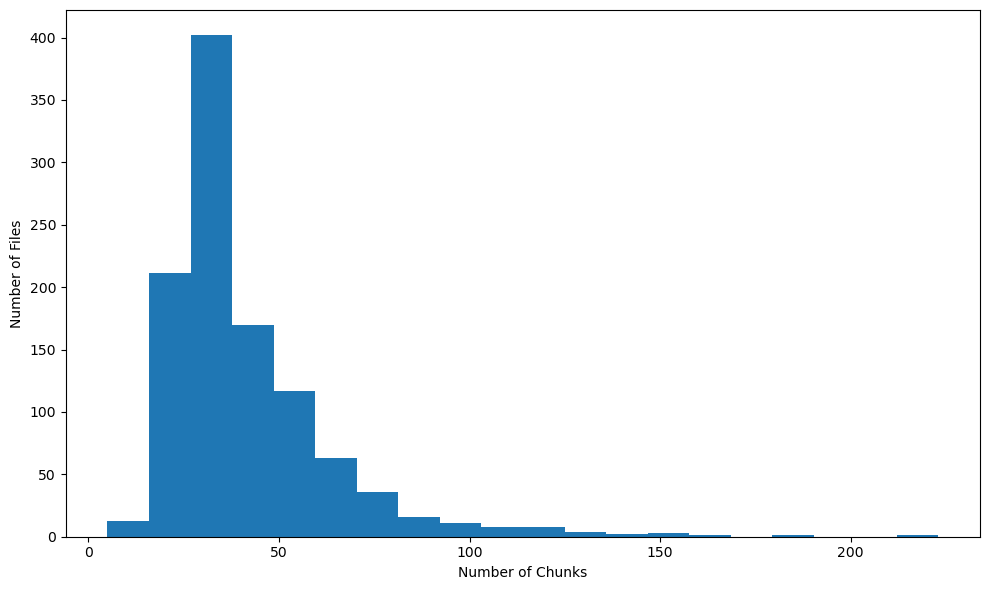

In [101]:
import matplotlib.pyplot as plt

counts = sorted(list(df.chunks))

counts.remove(max(counts))

plt.figure(figsize=(10, 6))
plt.hist(counts, bins=10)

plt.xlabel('Number of Chunks')
plt.ylabel('Number of Files')

plt.tight_layout()
plt.show()